In [14]:
import pandas as pd

# Daten einlesen
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')
train = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')

# Datentypen der Spalten anzeigen
print("Train Data Types:")
print(train.dtypes)

print("\nTest Data Types:")
print(test.dtypes)

# Identifizierung der nicht-numerischen Spalten
non_numerical_train = train.select_dtypes(include=['object', 'datetime']).columns
non_numerical_test = test.select_dtypes(include=['object', 'datetime']).columns

print("\nNicht-numerische Spalten im Trainingsdatensatz:")
print(non_numerical_train)

print("\nNicht-numerische Spalten im Testdatensatz:")
print(non_numerical_test)


Train Data Types:
date                            object
Unnamed: 0                       int64
n_sick                           int64
calls                            int64
n_duty                           int64
n_sby                            int64
sby_need                         int64
dafted                           int64
weekday                          int64
year                             int64
calendarweek                     int64
month                            int64
quarter                          int64
season                           int64
Feiertage                        int64
schulferien                      int64
Sick-ratio                     float64
Residuals_calls                float64
Residuals_Sick-ratio           float64
Ausreißer_Sick-ratio              bool
rolling_mean_7_calls           float64
rolling_mean_7_Sick-ratio      float64
lag_49_calls                   float64
lag_365_calls                  float64
lag_49_Sickratio               float64
lag_365

Coefficients: 
 [-1.46056405e+02 -1.71143111e+02  3.55718156e+02  5.14110068e+02
  2.00631336e-01  1.75566669e-01]
Mean squared error: 1041093.45
Coefficient of determination: 0.27
Mean Absolute Percentage Error (MAPE): 0.10%


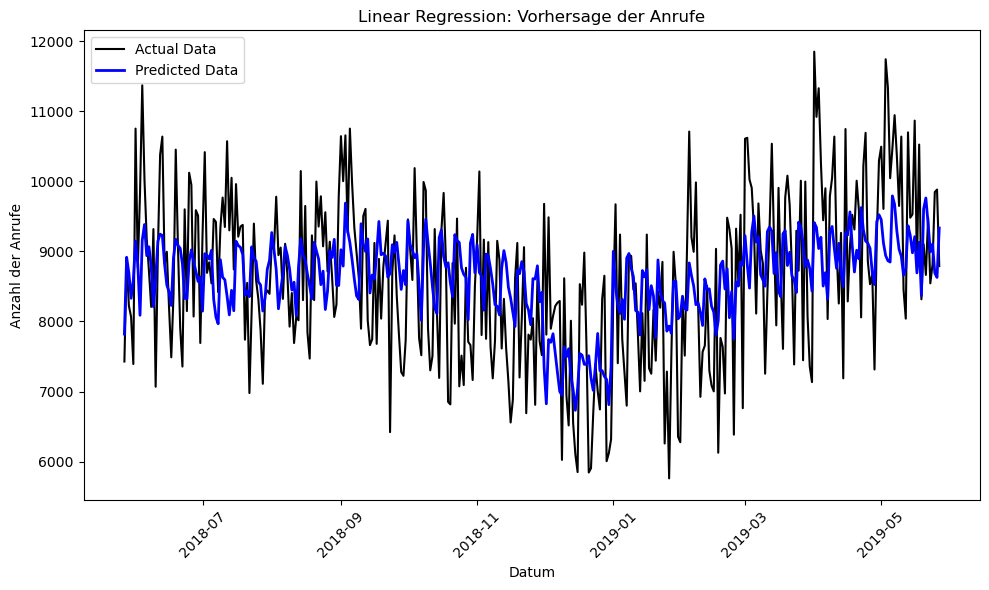

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Daten einlesen
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')
train = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')

# Datums-Spalte in Datetime-Format umwandeln
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])


# Auswahl mehrerer Features
# Champ features = ['weekday', 'quarter', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls']  # Hier kannst du beliebige Features hinzufügen
features = ['weekday', 'quarter', 'season', 'year', 'lag_365_calls', 'average7days45lag_calls']  # Hier kannst du beliebige Features hinzufügen
#1features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls']  # Hier kannst du beliebige Features hinzufügen
#2features =  ['schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls'] # Hier kannst du beliebige Features hinzufügen
#3features =  ['weekday', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls'] # Hier kannst du beliebige Features hinzufügen
#4features =  ['weekday', 'schulferien','month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls'] # Hier kannst du beliebige Features hinzufügen
#5features =  ['weekday', 'schulferien', 'calendarweek', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls'] # Hier kannst du beliebige Features hinzufügen
#6features =  ['weekday', 'schulferien', 'calendarweek', 'month', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls'] # Hier kannst du beliebige Features hinzufügen
#7features =  ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls'] # Hier kannst du beliebige Features hinzufügen
#8features =  ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls'] # Hier kannst du beliebige Features hinzufügen
#9features =  ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls'] # Hier kannst du beliebige Features hinzufügen
#10features =  ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_365_calls', 'average7days45lag_calls'] # Hier kannst du beliebige Features hinzufügen
#11features =  ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'average7days45lag_calls'] # Hier kannst du beliebige Features hinzufügen
#12features =  ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', ] # Hier kannst du beliebige Features hinzufügen

# Extrahiere die Werte für das Training und Testen
X_train = train[features].values
X_test = test[features].values

X_train = train[features].values
X_test = test[features].values

# Fehlende Werte im DataFrame behandeln
train = train.fillna(0)
test = test.fillna(0)  

# Zielvariable (Anzahl der Anrufe)
y_train = train['calls'].values
y_test = test['calls'].values

# Lineares Regressionsmodell erstellen
regr = LinearRegression()

# Modell mit den Trainingsdaten trainieren
regr.fit(X_train, y_train)

# Vorhersagen mit den Testdaten machen
y_pred = regr.predict(X_test)

# Die Koeffizienten anzeigen
print("Coefficients: \n", regr.coef_)
# Mean Squared Error anzeigen
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Bestimmtheitsmaß anzeigen (R^2-Wert)
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
# MAPE berechnen
mape = sklearn_mape(y_test, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# Ergebnisse plotten (nur ein Beispielplot)
plt.figure(figsize=(10, 6))
plt.plot(test['date'], y_test, color="black", label="Actual Data")
plt.plot(test['date'], y_pred, color="blue", linewidth=2, label="Predicted Data")

plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.title('Linear Regression: Vorhersage der Anrufe')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


prediction_df = pd.DataFrame({
    'date': test['date'],  # Datum aus dem Testdatensatz
    'MLR': y_pred         # Vorhersagen des Modells
})

prediction_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/prediction_MLR_calls.csv', index=False)


Selected features:  ['schulferien' 'quarter' 'Feiertage' 'season' 'year']
Feature ranking:  [1 1 1 1 1]
Mean squared error: 1372716.12
Coefficient of determination: 0.04


In [106]:
from sklearn.linear_model import LassoCV

# Erstelle und trainiere das Lasso-Modell mit Kreuzvalidierung
lasso = LassoCV(alphas=[0.1, 1.0, 10.0], cv=5)
lasso.fit(X_train, y_train)

# Zeige die Koeffizienten der Features
print("Lasso coefficients: ", lasso.coef_)

# Wähle Features mit nicht-null Koeffizienten aus
selected_features = np.array(features)[lasso.coef_ != 0]
print("Selected features: ", selected_features)

# Wende die Auswahl auf die Trainings- und Testdaten an
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]

# Trainiere das Modell mit den ausgewählten Features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Vorhersagen und Evaluation
y_pred = model.predict(X_test_selected)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Lasso coefficients:  [ 283.02440164 -228.19608238  803.96185896  460.15498568  450.86874405]
Selected features:  ['schulferien' 'quarter' 'Feiertage' 'season' 'year']
Mean squared error: 1372716.12
Coefficient of determination: 0.04


Best parameters: {'regressor__alpha': 10.0}
Best score (MSE): 1235288.1970142275
Mean squared error: 1069829.38
Coefficient of determination: 0.25


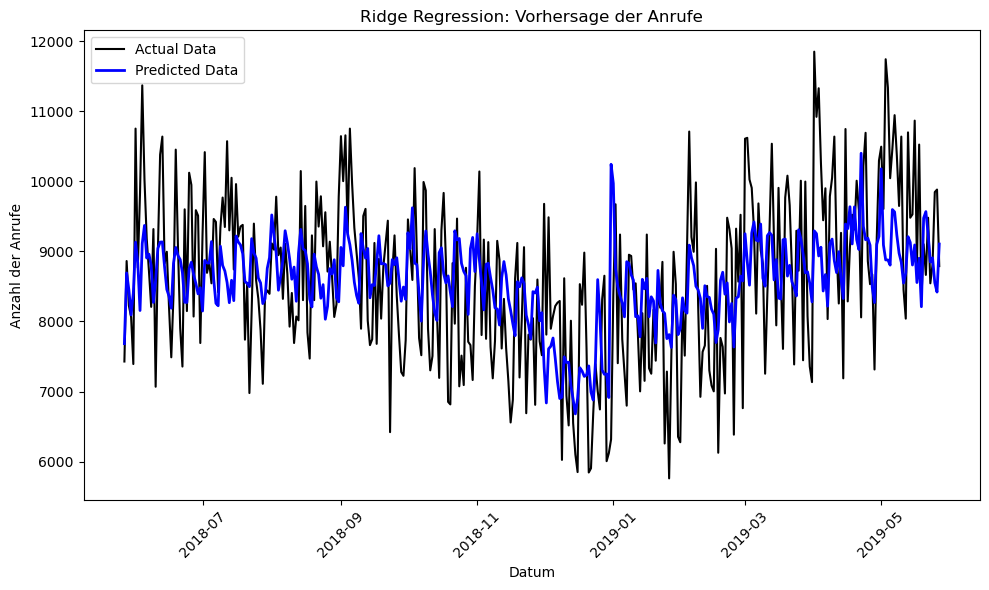

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Daten einlesen
test = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/test_data.csv')
train = pd.read_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/train_data.csv')

# Datums-Spalte in Datetime-Format umwandeln
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

# Auswahl der Features
features = ['weekday', 'schulferien', 'calendarweek', 'month', 'quarter', 'Feiertage', 'season', 'year', 'lag_49_calls', 'lag_365_calls', 'average7days45lag_calls']  # Hier kannst du beliebige Features hinzufügen

# Fehlende Werte im DataFrame behandeln
train = train.fillna(0)
test = test.fillna(0)

# Extrahiere die Werte für das Training und Testen
X_train = train[features].values
X_test = test[features].values

# Zielvariable (Anzahl der Anrufe)
y_train = train['calls'].values
y_test = test['calls'].values

# Pipeline mit Standardisierung und Ridge Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])

# Hyperparameter-Tuning mit Grid Search
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0]  # Beispielwerte für die Regularisierungsstärke
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Beste Parameter und Modellbewertung
print("Best parameters:", grid_search.best_params_)
print("Best score (MSE):", -grid_search.best_score_)

# Vorhersagen mit dem besten Modell
y_pred = grid_search.predict(X_test)

# Evaluation
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot der Ergebnisse
plt.figure(figsize=(10, 6))
plt.plot(test['date'], y_test, color="black", label="Actual Data")
plt.plot(test['date'], y_pred, color="blue", linewidth=2, label="Predicted Data")

plt.xlabel('Datum')
plt.ylabel('Anzahl der Anrufe')
plt.title('Ridge Regression: Vorhersage der Anrufe')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Ergebnisse speichern
prediction_df = pd.DataFrame({
    'date': test['date'],  # Datum aus dem Testdatensatz
    'Ridge_Regression': y_pred  # Vorhersagen des Modells
})

prediction_df.to_csv('/Users/frederic/Desktop/Fallstudie-Model-Engineering/data/processed/prediction_Ridge_Regression_calls.csv', index=False)
